#Другие методы снижения размерности и кластеризации

## Зачем это нужно?
- обрабатывать только самую \*важную* информацию (или ту по которой мы хотим анализировать данные)
- быстрее
- точнее
- понимаемее

## Что это?
- условная смена датасета: выбираем фичи, которые считаем \*важными*
- можно набирать фичи, можно исключать фичи
- в случае кластеризации - фиксированный параметр

## Почему они вместе?
![](https://static6.depositphotos.com/1052340/592/i/600/depositphotos_5924781-stock-photo-old-wooden-sieve.jpg)

### KMeans
![](https://uk.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/24616/versions/14/screenshot.jpg)

Расстояние - модуль разности картинок

In [404]:
# imports
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from scipy import linalg
import cv2
import random
random.seed(196)

In [405]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

classes = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

ind_train = [1, 2, 0, 101, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 102, 44, 45 ,46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 104, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
ind_val = random.sample(range(X_val.shape[0]), 100)

X_train =  X_train[ind_train]
y_train =  y_train[ind_train]

# Validation data 500 samples
X_val = X_val[ind_val]
y_val = y_val[ind_val]

assert X_train.shape == (100, 32, 32, 3)
assert X_val.shape == (100, 32, 32, 3)
assert y_train.shape == (100, 1)
assert y_val.shape == (100, 1)

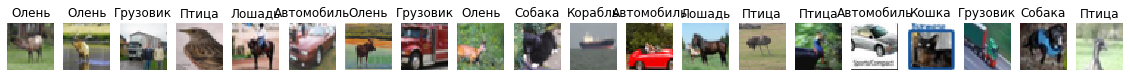

In [406]:
ind_show = random.sample(range(100), 20)
fig = plt.figure(figsize=(20, 20))
for i in range(20):
  fig.add_subplot(1, 20, i + 1)
  plt.imshow(X_train[ind_show[i]], interpolation='nearest')
  plt.title(classes[y_train[ind_show[i]][0]])
  plt.axis('off')
plt.show()

In [407]:
def show_cluster(in_cluster, i):
  number = len(in_cluster)
  print(f"cluster {i}: {number} elements")

  if(number>0):
   fig = plt.figure(figsize=(number, number))
  for i in range(number):
   fig.add_subplot(1, number, i + 1)
   plt.imshow(in_cluster[i], interpolation='nearest')
   plt.axis('off')
  plt.show()


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        centers = []
        for i in range(self.n_clusters):
            if len(X[self.labels == i]) == 0:
                mean = self.centers[i]
            else:
                mean = np.mean(X[self.labels == i], axis = 0)
            centers.append(mean)
        return np.array(centers)

    def update_lables(self, X):
        labels = []
        for x in X:           
            distances =  np.sum(np.sum(np.sum(np.abs(x -  self.centers), axis = 1), axis = 1), axis = 1)
            ind_nearest = np.argmin(distances)

            labels.append(ind_nearest)
        return np.array(labels)

    def fit(self, X):
        random.seed(self.seed)
        ind = random.sample(range(len(X)), self.n_clusters)
        self.centers = np.array(X[ind])
         
        self.labels = self.update_lables(X)
        for it in range(self.n_iters):
            new_labels = self.update_lables(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)

            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
            
                for i in range(self.n_clusters):
                 show_cluster(X[self.labels == i], i)

                return 0
      
            self.centers = new_centers

        return 1
    
    def predict(self, X):
        labels = self.update_lables(X)
        for i in range(self.n_clusters):
                 show_cluster(X[labels == i], i)
        return labels

cluster 0: 11 elements


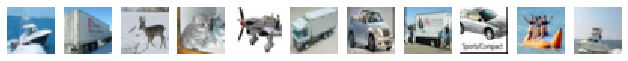

cluster 1: 2 elements


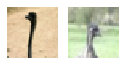

cluster 2: 1 elements


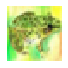

cluster 3: 20 elements


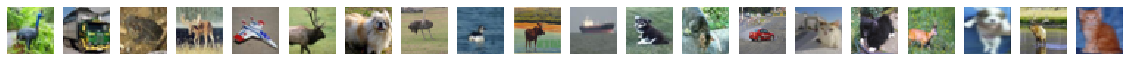

cluster 4: 10 elements


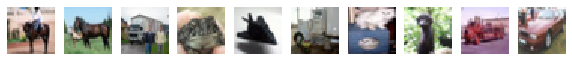

cluster 5: 3 elements


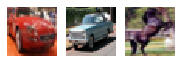

cluster 6: 26 elements


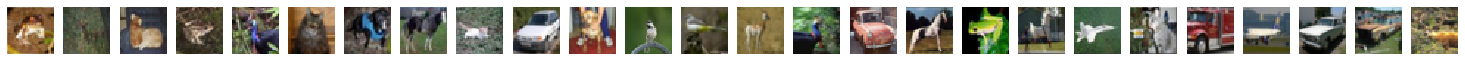

cluster 7: 6 elements


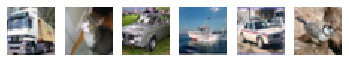

cluster 8: 7 elements


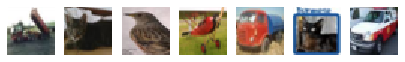

cluster 9: 14 elements


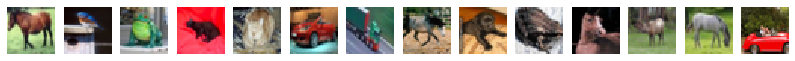

0

In [408]:
iters100 = MyKMeans(n_clusters = 10, n_iters = 10, seed = 5)
iters100.fit(X_train)

cluster 0: 13 elements


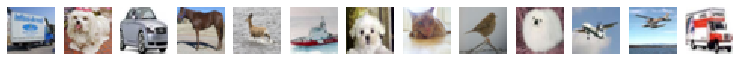

cluster 1: 3 elements


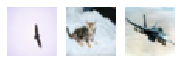

cluster 2: 0 elements
cluster 3: 25 elements


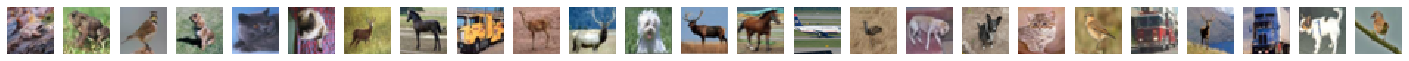

cluster 4: 11 elements


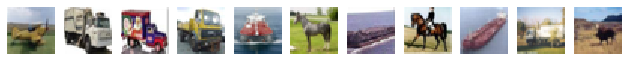

cluster 5: 4 elements


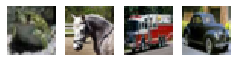

cluster 6: 18 elements


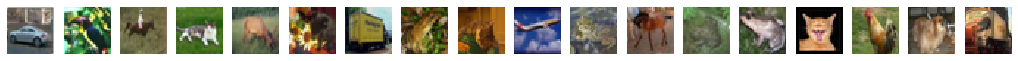

cluster 7: 6 elements


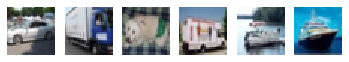

cluster 8: 7 elements


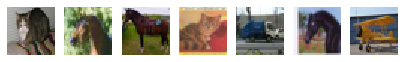

cluster 9: 13 elements


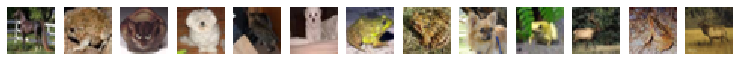

In [409]:
predict100 = iters100.predict(X_val)

K-means 

Достоинства:
- не сложный
- очень легко интерпретируемый
- всегда сходится к локальному минимуму функции потерь

Недостатки:
- требует задания параметров: числа кластеров, изначальных центров
- очень чувствителен к выбору последних
- находит только сферические кластеры
- чувствителен к выбросам
- ... а это точно та метрика по которой мы хотим классифицировать картинки?

### DBSCAN

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png)

- Расстояние - модуль разности картинок
- Картинки, у которых 0 соседей - выбросы
- Картинки, у которых < n но > 0 соседей - границы
- Картинки, у которых >= n соседей - кластер

In [410]:
class MyDBSCAN:

    def __init__(self, eps, min_neighbours, X):
      self.eps = eps
      self.min_neighbours = min_neighbours
      self.X = X


    def check_core(self, eps, min_neighbours, X, index):
      pic = X[index]
      distances = np.sum(np.sum(np.sum(np.abs(pic -  X), axis = 1), axis = 1), axis = 1)
      temp = X[ (distances <= eps)  &  (distances != 0)]
    
      if len(temp) >= min_neighbours:
           return (range(len(temp)), "core")
    
      elif (len(temp) < min_neighbours) and len(temp) > 0:
           return (range(len(temp)), "border")
    
      elif len(temp) == 0:
          return (range(len(temp)), "noise")


    def cluster(self):
     current_cluster = 1
     current_stack = set()
     unvisited = list(range(len(self.X)))
     print(unvisited)
     clusters = []
  
     while (len(unvisited) != 0):
         first = True
         to_visit = random.choice(unvisited)
         current_stack.add(to_visit)
        
         while len(current_stack) != 0:
             curr_idx = current_stack.pop()
            
             neighbour_indices, status = self.check_core(self.eps, self.min_neighbours, self.X, curr_idx)

             if ((status == "border") & first):
                 clusters.append((curr_idx, 0))
                 clusters.extend(list(zip(neighbour_indices,[0 for _ in range(len(neighbour_indices))])))

                 unvisited.remove(curr_idx)
                 unvisited = [i for i in unvisited if i not in neighbour_indices]
                 continue
                
             unvisited.remove(curr_idx)
             neighbour_indices = set(neighbour_indices) & set(unvisited)
            
             if (status == "core"):
                 first = False
                
                 clusters.append((curr_idx,current_cluster))
                 current_stack.update(neighbour_indices)

             elif (status == "border"):
                 clusters.append((curr_idx,current_cluster))
                
                 continue

             elif (status == "noise"):
                 clusters.append((curr_idx, 0))
                 
                 continue
                
         if not first:
             current_cluster+=1
        
     return clusters

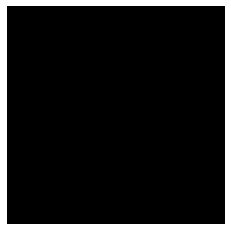

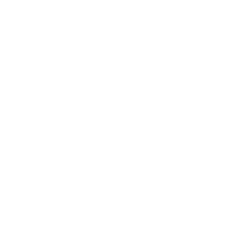

max distance 783360


In [411]:
black =np.full((32, 32, 3), 0)
white =np.full((32, 32, 3), 255)
plt.imshow(black, interpolation='nearest')
plt.axis('off')
plt.show()
plt.imshow(white, interpolation='nearest')
plt.axis('off')
plt.show()
print(f"max distance {np.sum(np.sum(np.sum(np.abs(black -  white), axis = 1), axis = 1), axis = 0)}")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
cluster 0: 67 elements


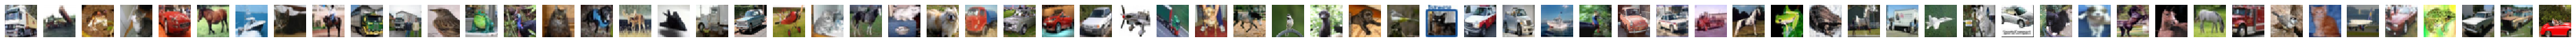

cluster 1: 3 elements


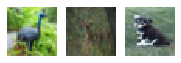

cluster 2: 1 elements


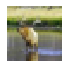

cluster 3: 4 elements


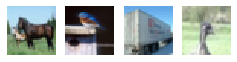

cluster 4: 1 elements


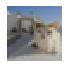

cluster 5: 7 elements


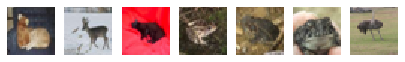

cluster 6: 1 elements


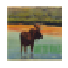

cluster 7: 1 elements


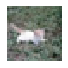

cluster 8: 1 elements


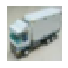

cluster 9: 1 elements


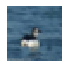

cluster 10: 1 elements


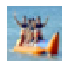

cluster 11: 1 elements


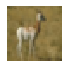

cluster 12: 1 elements


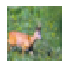

cluster 13: 1 elements


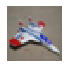

cluster 14: 1 elements


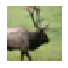

cluster 15: 1 elements


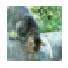

cluster 16: 1 elements


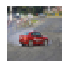

cluster 17: 1 elements


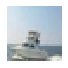

cluster 18: 1 elements


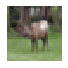

cluster 19: 1 elements


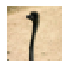

cluster 20: 1 elements


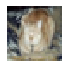

cluster 21: 1 elements


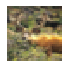

cluster 22: 1 elements


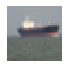

In [412]:
dbscan = MyDBSCAN(300000, 5, X_train)
clustered = dbscan.cluster()
idx , cluster = list(zip(*clustered))
cluster_df = pd.DataFrame(clustered, columns = ["idx", "cluster"])

for i in range(cluster_df['cluster'].nunique()):
  indices = np.unique(np.array(cluster_df[cluster_df["cluster"] == i]["idx"]))
  show_cluster(X_train[indices], i)

- Не выглядит осмысленно

## Можно обрабатывать картинки по одной!
![](https://developers.cloudflare.com/images/static/polish.png)

- Выделение фич внутри изображения
- Сжатие

### Library cv2 KMeans

source https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html

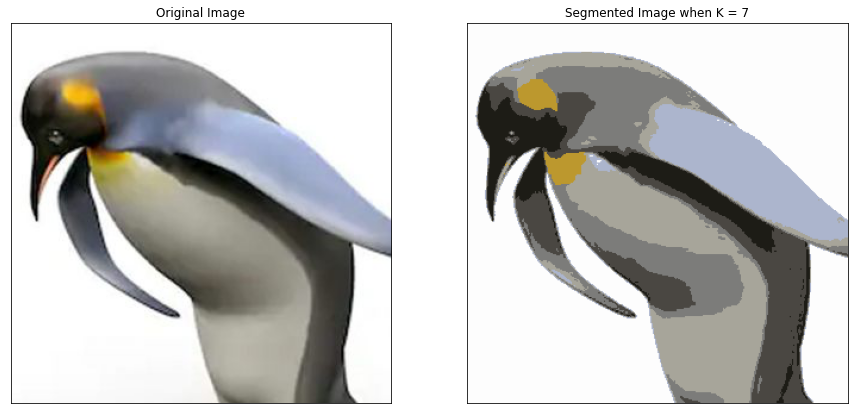

In [413]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
from skimage import io

img = io.imread('https://ehobby.ru/users/604/reg/320x320_61e124ae3b8ac.jpg')

vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 7
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

### Custom Kmeans

In [414]:
class MyKMeansImage():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        centers = []
        for i in range(self.n_clusters):
            if len(X[self.labels == i]) == 0:
                mean = self.centers[i]
            else:
                mean = np.mean(X[self.labels == i], axis = 0)
            centers.append(mean)
        return np.array(centers)

    def update_lables(self, X):
        labels = []
        for x in X:           
            distances = np.sum(np.abs(x -  self.centers), axis = 1)
            ind_nearest = np.argmin(distances)
            labels.append(self.centers[ind_nearest])
        return np.array(labels)

    def fit(self, X):
        random.seed(self.seed)
        ind = random.sample(range(len(X)), self.n_clusters)
        self.centers = np.array(X[ind])
         
        self.labels = self.update_lables(X)
        for it in range(self.n_iters):
            new_labels = self.update_lables(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)

            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                
                picture = self.labels.reshape((32, 32, 3))
                plt.imshow(picture, interpolation='nearest')
                plt.axis('off')

                return picture
      
            self.centers = new_centers

        picture = self.labels.reshape((32, 32, 3))
        plt.imshow(picture, interpolation='nearest')
        plt.axis('off')
        return picture
    
    def predict(self, X):
        labels = self.update_lables(X)
        return labels

(-0.5, 31.5, 31.5, -0.5)

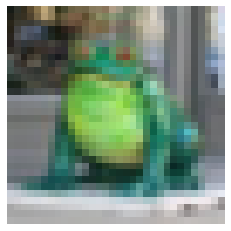

In [415]:
image = X_train[18]
plt.imshow(image, interpolation='nearest')
plt.axis('off')

(-0.5, 31.5, 31.5, -0.5)

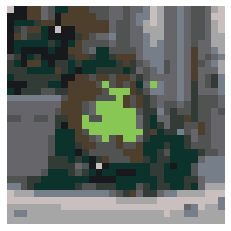

In [416]:
image_pixels = image.reshape((1024, 3))
iters100 = MyKMeansImage(n_clusters = 10, n_iters = 10, seed = 5)
res = iters100.fit(image_pixels)
plt.imshow(res, interpolation='nearest')
plt.axis('off')

(-0.5, 31.5, 31.5, -0.5)

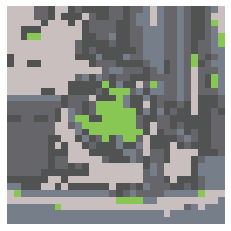

In [417]:
image_pixels = image.reshape((1024, 3))
iters100 = MyKMeansImage(n_clusters = 5, n_iters = 10, seed = 5)
res = iters100.fit(image_pixels)
plt.imshow(res, interpolation='nearest')
plt.axis('off')

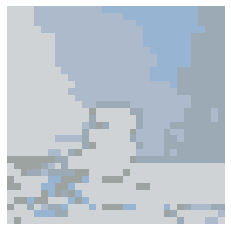

In [418]:
X_train_processed = []
for i in range(len(X_train)):
  image = X_train[i]
  image_pixels = (image).reshape((1024, 3))
  iters100 = MyKMeansImage(n_clusters = 5, n_iters = 10, seed = 5)
  res = iters100.fit(image_pixels)
  X_train_processed.append(res)

cluster 0: 11 elements


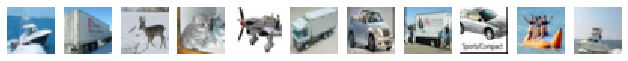

cluster 1: 2 elements


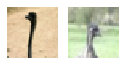

cluster 2: 1 elements


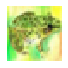

cluster 3: 20 elements


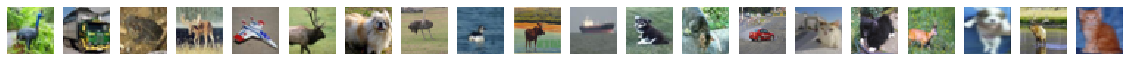

cluster 4: 10 elements


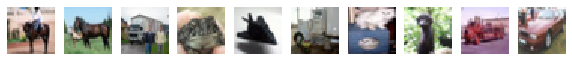

cluster 5: 3 elements


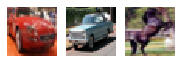

cluster 6: 26 elements


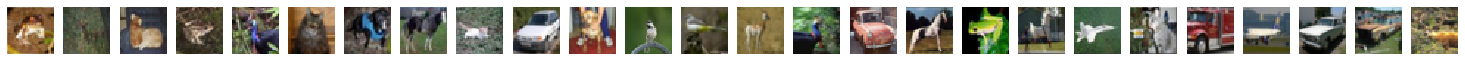

cluster 7: 6 elements


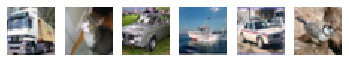

cluster 8: 7 elements


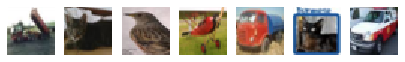

cluster 9: 14 elements


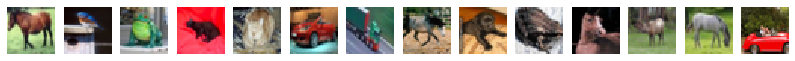

0

In [419]:
iters8 = MyKMeans(n_clusters = 10, n_iters = 8, seed = 5)
iters8.fit(X_train)

cluster 0: 3 elements


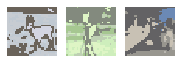

cluster 1: 3 elements


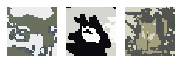

cluster 2: 1 elements


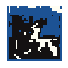

cluster 3: 10 elements


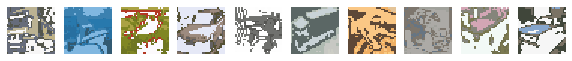

cluster 4: 11 elements


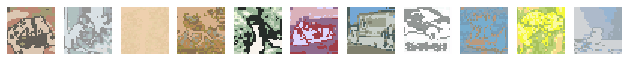

cluster 5: 1 elements


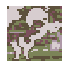

cluster 6: 39 elements


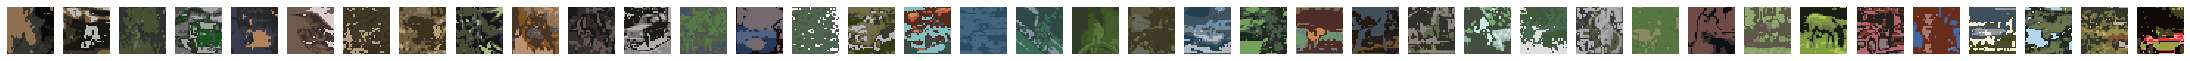

cluster 7: 14 elements


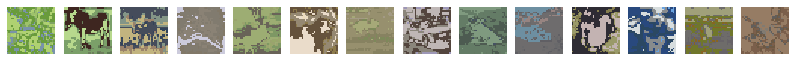

cluster 8: 8 elements


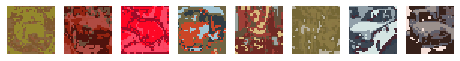

cluster 9: 10 elements


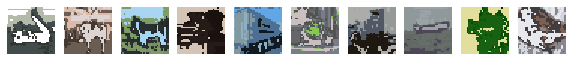

0

In [420]:
X_train_processed = np.array(X_train_processed).reshape((100, 32, 32, 3))
iters8 = MyKMeans(n_clusters = 10, n_iters = 8, seed = 5)
iters8.fit(X_train_processed)

- Полезно: выделяет только основные цвета и формы, избавляется от деталей
- Не очень полезно: ориентирован на цвета (по причине выбора расстояния)

##Снижение размерности
### PCA
![](https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png)

Что это?
- Principal Component Analysis
- Выбирает основные измерения

Как это?
- Линал...
- Центрируем матрицу
- Делаем сингулярное разложение: A = USV^H
- Берем из него столько измерений, сколько хотим (берем части полученных матриц)
- Перемножаем назад, получаем уменьшенное в размерности изображение A

In [421]:
class MyPCA():

    def __init__(self, n_components):
        self.n_components = n_components

    def reduce(self, X):

        n_rows = len(X)

        mean = np.mean(X, axis=0)
        X -= mean

        left_singular_vector, singular_values, right_singular_vector = linalg.svd(X, full_matrices = False)

        left_singular_vector = left_singular_vector[:, : self.n_components]
        left_singular_vector *= singular_values[: self.n_components]
        right_singular_vector = right_singular_vector[: self.n_components]

        return left_singular_vector, right_singular_vector


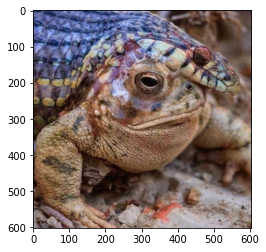

In [422]:
img = cv2.cvtColor(cv2.imread('jaba.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

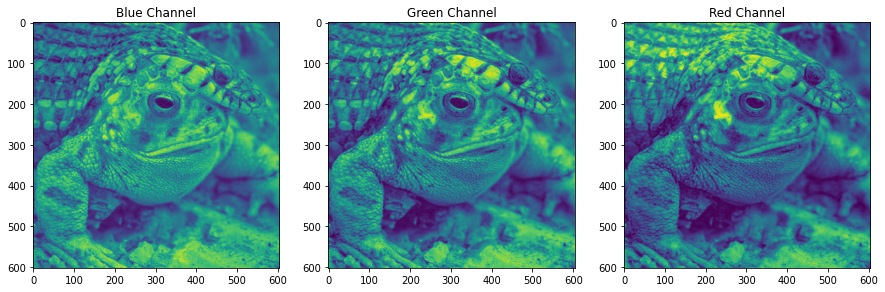

In [423]:
blue,green,red = cv2.split(img)

blue_f = blue/255
green_f = green/255
red_f = red/255

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [424]:
pca = MyPCA(10)

left_singular_vector_b, right_singular_vector_b = pca.reduce(blue_f)
left_singular_vector_g, right_singular_vector_g = pca.reduce(green_f)
left_singular_vector_r, right_singular_vector_r = pca.reduce(red_f)

In [425]:
b_arr = np.dot(left_singular_vector_b, right_singular_vector_b) 
g_arr = np.dot(left_singular_vector_g, right_singular_vector_g) 
r_arr = np.dot(left_singular_vector_r, right_singular_vector_r)

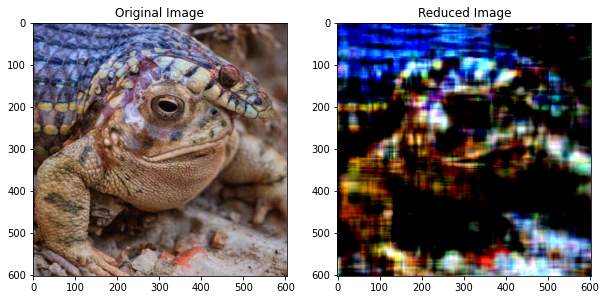

In [426]:
b_arr = b_arr*3
g_arr = g_arr*3
r_arr = r_arr*3

img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
img_back= (cv2.merge((blue, green, red)))

fig = plt.figure(figsize = (10, 7.2)) 

fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img_back)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

- Полезно для сжатия картинок (и если вы любите их шакалить - тоже)
- Выделяет \*важные* вещи

#Общие выводы
- Алгоритмы можно использовать на картинках
- Как на массивах картинок так и на единичных картинках
- Удобнее пользоваться библиотеками.......
- Выделение фич происходит ...
- ... но те ли это фичи, по которым мы хотим классифицировать картинки?

![](https://www.bethowen.ru/upload/iblock/63f/63f2f01ca6828d9574995f549d89a2e0.jpeg)

![](https://murchim.ru/_sf/0/67416741.jpg)

![](https://yt3.ggpht.com/rtPWN7P3z5oPJaZfneEEvqAZ3zn7lw0G3oEiI74U7Ul5sOHIyd9pLTZ9_NZAdos6IC9XAx-qbl8=s900-c-k-c0x00ffffff-no-rj)



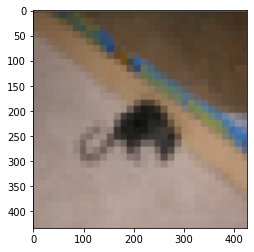

In [427]:
img = cv2.cvtColor(cv2.imread('cat.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()